In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print("Pandas version:",pd.__version__)
print("Numpy version:",np.__version__)

Pandas version: 0.22.0
Numpy version: 1.14.1


In [3]:
#read NYC turntable for the week of march 10th
df = pd.read_csv("NYCT180310.csv")

In [4]:
df.isnull().sum()

C/A                                                                     0
UNIT                                                                    0
SCP                                                                     0
STATION                                                                 0
LINENAME                                                                0
DIVISION                                                                0
DATE                                                                    0
TIME                                                                    0
DESC                                                                    0
ENTRIES                                                                 0
EXITS                                                                   0
dtype: int64

In [5]:
#march[march["ENTRIES"] == 0].index
#march[410:430]
df.describe()

ENTRIES  \
count  1.991160e+05   
mean   3.972039e+07   
std    2.073240e+08   
min    0.000000e+00   
25%    5.048800e+05   
50%    2.599027e+06   
75%    6.920500e+06   
max    2.130056e+09   

       EXITS                                                                 
count                                       1.991160e+05                     
mean                                        3.243020e+07                     
std                                         1.905868e+08                     
min                                         0.000000e+00                     
25%                                         2.491722e+05                     
50%                                         1.462528e+06                     
75%                                         4.824967e+06                     
max                                         2.145850e+09

In [6]:
#df = df.set_index(['C/A', 'UNIT', 'SCP', 'STATION'])
#remove extra spaces in strings of columns
df.columns = df.columns.str.strip()
df.head(20)

C/A  UNIT       SCP STATION LINENAME DIVISION        DATE      TIME  \
0   A002  R051  02-00-00   59 ST  NQR456W      BMT  03/03/2018  03:00:00   
1   A002  R051  02-00-00   59 ST  NQR456W      BMT  03/03/2018  07:00:00   
2   A002  R051  02-00-00   59 ST  NQR456W      BMT  03/03/2018  11:00:00   
3   A002  R051  02-00-00   59 ST  NQR456W      BMT  03/03/2018  15:00:00   
4   A002  R051  02-00-00   59 ST  NQR456W      BMT  03/03/2018  19:00:00   
5   A002  R051  02-00-00   59 ST  NQR456W      BMT  03/03/2018  23:00:00   
6   A002  R051  02-00-00   59 ST  NQR456W      BMT  03/04/2018  03:00:00   
7   A002  R051  02-00-00   59 ST  NQR456W      BMT  03/04/2018  07:00:00   
8   A002  R051  02-00-00   59 ST  NQR456W      BMT  03/04/2018  11:00:00   
9   A002  R051  02-00-00   59 ST  NQR456W      BMT  03/04/2018  15:00:00   
10  A002  R051  02-00-00   59 ST  NQR456W      BMT  03/04/2018  19:00:00   
11  A002  R051  02-00-00   59 ST  NQR456W      BMT  03/04/2018  23:00:00   
12  A002  R051  02-00-00   59 ST  NQR456W      BMT  03/05/2018  03:00:00   
13  A002  R051  02-00-00   59 ST  NQR456W      BMT  03/05/2018  07:00:00   
14  A002  R051  02-00-00   59 ST  NQR456W      BMT  03/05/2018  11:00:00   
15  A002  R051  02-00-00   59 ST  NQR456W      BMT  03/05/2018  15:00:00   
16  A002  R051  02-00-00   59 ST  NQR456W      BMT  03/05/2018  19:00:00   
17  A002  R051  02-00-00   59 ST  NQR456W      BMT  03/05/2018  23:00:00   
18  A002  R051  02-00-00   59 ST  NQR456W      BMT  03/06/2018  03:00:00   
19  A002  R051  02-00-00   59 ST  NQR456W      BMT  03/06/2018  07:00:00   

       DESC  ENTRIES    EXITS  
0   REGULAR  6535802  2213345  
1   REGULAR  6535813  2213356  
2   REGULAR  6535865  2213436  
3   REGULAR  6536048  2213481  
4   REGULAR  6536326  2213531  
5   REGULAR  6536487  2213562  
6   REGULAR  6536518  2213570  
7   REGULAR  6536526  2213579  
8   REGULAR  6536576  2213626  
9   REGULAR  6536723  2213669  
10  REGULAR  6536919  2213715  
11  REGULAR  6537037  2213735  
12  REGULAR  6537057  2213744  
13  REGULAR  6537067  2213787  
14  REGULAR  6537229  2214053  
15  REGULAR  6537432  2214131  
16  REGULAR  6538196  2214201  
17  REGULAR  6538436  2214234  
18  REGULAR  6538452  2214235  
19  REGULAR  6538472  2214266

In [7]:
# convert to datetime if necessary
#pd.to_datetime(df.DATE + " " + df.TIME)

#
num_resets = df[df["ENTRIES"] == 0]
print(len(num_resets))
print("There are 3239 resets")
len(df)

3239
There are 3239 resets


199116

In [9]:
#remove reset entries and designate this new dataframe as df_r
df_r = df[df.ENTRIES != 0]
len(df_r[df_r["ENTRIES"] == 0])
print("removed", len(df) - len(df_r), "entries")

removed 0 entries


In [10]:
#create a unique string for each turnstile and add it as the 4th index
ts = df_r['C/A']+df_r.UNIT+df_r.SCP+df_r.STATION
df_r.insert(loc=4, column='TS', value=ts)
df_r

C/A  UNIT       SCP        STATION                              TS  \
0        A002  R051  02-00-00          59 ST           A002R05102-00-0059 ST   
1        A002  R051  02-00-00          59 ST           A002R05102-00-0059 ST   
2        A002  R051  02-00-00          59 ST           A002R05102-00-0059 ST   
3        A002  R051  02-00-00          59 ST           A002R05102-00-0059 ST   
4        A002  R051  02-00-00          59 ST           A002R05102-00-0059 ST   
5        A002  R051  02-00-00          59 ST           A002R05102-00-0059 ST   
6        A002  R051  02-00-00          59 ST           A002R05102-00-0059 ST   
7        A002  R051  02-00-00          59 ST           A002R05102-00-0059 ST   
8        A002  R051  02-00-00          59 ST           A002R05102-00-0059 ST   
9        A002  R051  02-00-00          59 ST           A002R05102-00-0059 ST   
10       A002  R051  02-00-00          59 ST           A002R05102-00-0059 ST   
11       A002  R051  02-00-00          59 ST           A002R05102-00-0059 ST   
12       A002  R051  02-00-00          59 ST           A002R05102-00-0059 ST   
13       A002  R051  02-00-00          59 ST           A002R05102-00-0059 ST   
14       A002  R051  02-00-00          59 ST           A002R05102-00-0059 ST   
15       A002  R051  02-00-00          59 ST           A002R05102-00-0059 ST   
16       A002  R051  02-00-00          59 ST           A002R05102-00-0059 ST   
17       A002  R051  02-00-00          59 ST           A002R05102-00-0059 ST   
18       A002  R051  02-00-00          59 ST           A002R05102-00-0059 ST   
19       A002  R051  02-00-00          59 ST           A002R05102-00-0059 ST   
20       A002  R051  02-00-00          59 ST           A002R05102-00-0059 ST   
21       A002  R051  02-00-00          59 ST           A002R05102-00-0059 ST   
22       A002  R051  02-00-00          59 ST           A002R05102-00-0059 ST   
23       A002  R051  02-00-00          59 ST           A002R05102-00-0059 ST   
24       A002  R051  02-00-00          59 ST           A002R05102-00-0059 ST   
25       A002  R051  02-00-00          59 ST           A002R05102-00-0059 ST   
26       A002  R051  02-00-00          59 ST           A002R05102-00-0059 ST   
27       A002  R051  02-00-00          59 ST           A002R05102-00-0059 ST   
28       A002  R051  02-00-00          59 ST           A002R05102-00-0059 ST   
29       A002  R051  02-00-00          59 ST           A002R05102-00-0059 ST   
...       ...   ...       ...            ...                             ...   
199086  TRAM2  R469  00-03-01  RIT-ROOSEVELT  TRAM2R46900-03-01RIT-ROOSEVELT   
199087  TRAM2  R469  00-03-01  RIT-ROOSEVELT  TRAM2R46900-03-01RIT-ROOSEVELT   
199088  TRAM2  R469  00-03-01  RIT-ROOSEVELT  TRAM2R46900-03-01RIT-ROOSEVELT   
199089  TRAM2  R469  00-03-01  RIT-ROOSEVELT  TRAM2R46900-03-01RIT-ROOSEVELT   
199090  TRAM2  R469  00-03-01  RIT-ROOSEVELT  TRAM2R46900-03-01RIT-ROOSEVELT   
199091  TRAM2  R469  00-03-01  RIT-ROOSEVELT  TRAM2R46900-03-01RIT-ROOSEVELT   
199092  TRAM2  R469  00-03-01  RIT-ROOSEVELT  TRAM2R46900-03-01RIT-ROOSEVELT   
199093  TRAM2  R469  00-03-01  RIT-ROOSEVELT  TRAM2R46900-03-01RIT-ROOSEVELT   
199094  TRAM2  R469  00-03-01  RIT-ROOSEVELT  TRAM2R46900-03-01RIT-ROOSEVELT   
199095  TRAM2  R469  00-03-01  RIT-ROOSEVELT  TRAM2R46900-03-01RIT-ROOSEVELT   
199096  TRAM2  R469  00-03-01  RIT-ROOSEVELT  TRAM2R46900-03-01RIT-ROOSEVELT   
199097  TRAM2  R469  00-03-01  RIT-ROOSEVELT  TRAM2R46900-03-01RIT-ROOSEVELT   
199098  TRAM2  R469  00-03-01  RIT-ROOSEVELT  TRAM2R46900-03-01RIT-ROOSEVELT   
199099  TRAM2  R469  00-03-01  RIT-ROOSEVELT  TRAM2R46900-03-01RIT-ROOSEVELT   
199100  TRAM2  R469  00-03-01  RIT-ROOSEVELT  TRAM2R46900-03-01RIT-ROOSEVELT   
199101  TRAM2  R469  00-03-01  RIT-ROOSEVELT  TRAM2R46900-03-01RIT-ROOSEVELT   
199102  TRAM2  R469  00-03-01  RIT-ROOSEVELT  TRAM2R46900-03-01RIT-ROOSEVELT   
199103  TRAM2  R469  00-03-01  RIT-ROOSEVELT  TRAM2R46900-03-01RIT-ROOSEVELT   
199104  TR

In [60]:
# groupby TS and DATE, then create a new column "dif" for max - min
gb = df_r.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"]).ENTRIES.agg(["min", "max"])
gb2 = df_r.groupby(["TS", "DATE"]).ENTRIES.agg(["min", "max"])
gb["dif"] = gb["max"] - gb["min"]
gb2["dif"] = gb2["max"] - gb2["min"]


In [61]:

#plt.barh(gb.index.levels[1],gb.dif)
gb.dif.describe()
#sns.boxplot(gb.dif)
#odd = len(gb[gb.dif > 10000])
#print("there are", odd, "days that had more than 10,000 entries (what I may consider odd/outliers)")


count    3.241900e+04
mean     1.425278e+03
std      3.390631e+04
min      0.000000e+00
25%      2.630000e+02
50%      7.640000e+02
75%      1.471000e+03
max      3.917644e+06
Name: dif, dtype: float64

In [62]:
# Take a look at the outliers >10000
gb[gb.dif > 10000]

min       max      dif
C/A   UNIT SCP      STATION         DATE                                   
G009  R151 02-00-03 CONEY IS-STILLW 03/07/2018        92   3793593  3793501
H038  R350 00-06-00 LIVONIA AV      03/03/2018    458766    475010    16244
N327  R254 00-00-00 GRAND-NEWTOWN   03/04/2018         7   1225194  1225187
           00-05-04 GRAND-NEWTOWN   03/08/2018       382   2029602  2029220
N343  R019 00-00-04 JAMAICA 179 ST  03/06/2018        26   3917670  3917644
PTH01 R549 00-00-06 NEWARK HW BMEBE 03/09/2018        96     87949    87853
PTH03 R552 00-00-09 JOURNAL SQUARE  03/06/2018        58    680608   680550
                                    03/07/2018       431    682273   681842
                                    03/08/2018      1130    685178   684048
                                    03/09/2018      1975    687455   685480
           00-02-01 JOURNAL SQUARE  03/06/2018        64    151997   151933
PTH18 R549 01-02-00 NEWARK BM BW    03/05/2018        25     94665    94640
PTH22 R540 00-01-00 PATH NEW WTC    03/09/2018      1188    107295   106107
R238  R046 00-03-04 GRD CNTRL-42 ST 03/09/2018  34496754  34506882    10128

### Looking at the data, it seems obvious that some of these entries have been reset (The ones where min are VERY low compared to the max. We can now get a better sense of the correct cutoff to not remove the entries that did not seem to reset, i.e. 20,000.

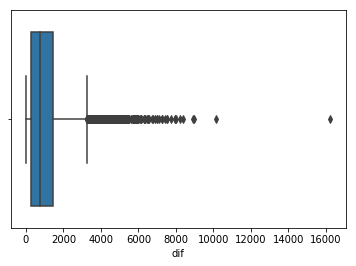

In [63]:
# gb_r is gb with the obviousresets removed
gb_r = gb[gb.dif < 20000]
# Show boxplot 
sns.boxplot(gb_r.dif);

<Container object of 7 artists>

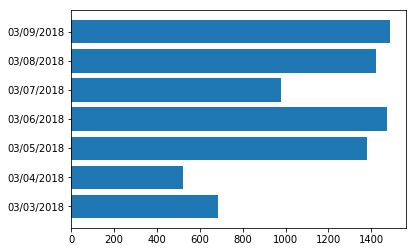

In [65]:
plt.barh(gb_r[:7].index.levels[4], gb_r[:7]["dif"])
#gb_r.head

In [66]:
gb_r.reset_index().head()

C/A  UNIT       SCP STATION        DATE      min      max   dif
0  A002  R051  02-00-00   59 ST  03/03/2018  6535802  6536487   685
1  A002  R051  02-00-00   59 ST  03/04/2018  6536518  6537037   519
2  A002  R051  02-00-00   59 ST  03/05/2018  6537057  6538436  1379
3  A002  R051  02-00-00   59 ST  03/06/2018  6538452  6539924  1472
4  A002  R051  02-00-00   59 ST  03/07/2018  6539944  6540923   979

In [68]:
gb_r.groupby(["STATION"]).agg("sum").sort_values("dif", ascending=False)

min          max     dif
STATION                                          
34 ST-PENN STA   27762623177  27763496055  872878
GRD CNTRL-42 ST  10613072314  10613842400  770086
34 ST-HERALD SQ  39155760308  39156442601  682293
23 ST            46876403486  46877052008  648522
42 ST-PORT AUTH  53064212439  53064759310  546871
TIMES SQ-42 ST   40817101539  40817646648  545109
14 ST-UNION SQ    5333642486   5334158830  516344
FULTON ST        30309741463  30310242353  500890
86 ST            21398926861  21399407947  481086
125 ST           40065113075  40065566171  453096
59 ST COLUMBUS   23768486478  23768897419  410941
CANAL ST         41992569490  41992959458  389968
59 ST            28300528095  28300906777  378682
CHAMBERS ST      35541852600  35542203652  351052
96 ST             1837387853   1837738534  350681
FLUSHING-MAIN     1341074709   1341408734  334025
14 ST            32077332211  32077663172  330961
JKSN HT-ROOSVLT    970211128    970515633  304505
47-50 STS ROCK   16812533394  16812834350  300956
50 ST             1150879829   1151155019  275190
ATL AV-BARCLAY    6982920974   6983191295  270321
PATH NEW WTC        43377659     43643608  265949
JAY ST-METROTEC   4585816882   4586074394  257512
28 ST            11593816742  11594073076  256334
72 ST            25174510548  25174747756  237208
145 ST            6559067411   6559294511  227100
LEXINGTON AV/53  18897512849  18897739827  226978
WALL ST           4613321555   4613546695  225140
DEKALB AV        23818178593  23818396879  218286
42 ST-BRYANT PK  13630643299  13630861075  217776
...                      ...          ...     ...
55 ST               82659430     82672613   13183
MORRIS PARK         55779567     55792363   12796
JUNIUS ST           96659755     96671749   11994
FOREST AVE          95573677     95585652   11975
W 8 ST-AQUARIUM     87358512     87370485   11973
BEACH 25 ST         56667607     56679082   11475
WHITLOCK AV         51796059     51807510   11451
ATLANTIC AV         19750637     19762033   11396
215 ST              71646140     71657438   11298
MIDDLETOWN RD       75114052     75125211   11159
21 ST               24463419     24474513   11094
ALABAMA AV          49599581     49609908   10327
AVENUE N          1042578776   1042588937   10161
BOTANIC GARDEN      39242856     39251717    8861
NEPTUNE AV          52676596     52685406    8810
AVENUE P            90314719     90323380    8661
CYPRESS HILLS       46208811     46216355    7544
121 ST             667176937    667182968    6031
E 143/ST MARY'S     36755810     36761756    5946
BEACH 36 ST         32119183     32124720    5537
AQUEDUCT N.COND     35537386     35542650    5264
BEACH 90 ST         41277766     41282382    4616
BEACH 44 ST         20420897     20425210    4313
TOMPKINSVILLE       66276962     66281170    4208
ROCKAWAY PARK B    739293489    739297099    3610
BEACH 98 ST         33270709     33273514    2805
SENECA AVE          44868440     44871200    2760
BROAD CHANNEL        9064958      9066574    1616
BEACH 105 ST       831417374    831418778    1404
NEWARK HM HE         5127182      5127182       0

[372 rows x 3 columns]

In [48]:
##Disregard this cell. Just for testing

# #df[df["STATION"] == "23 ST"].groupby(["LINENAME"]).count()
# gb3 = df_r.groupby(["C/A", "UNIT", "SCP", "STATION", "LINENAME","DATE"]).ENTRIES.agg(["min", "max"])
# gb3#[gb3["STATION"] == "23 ST"]

min      max
C/A   UNIT SCP      STATION       LINENAME DATE                        
A002  R051 02-00-00 59 ST         NQR456W  03/03/2018  6535802  6536487
                                           03/04/2018  6536518  6537037
                                           03/05/2018  6537057  6538436
                                           03/06/2018  6538452  6539924
                                           03/07/2018  6539944  6540923
                                           03/08/2018  6540936  6542356
                                           03/09/2018  6542379  6543867
           02-00-01 59 ST         NQR456W  03/03/2018  5865197  5865776
                                           03/04/2018  5865810  5866249
                                           03/05/2018  5866268  5867410
                                           03/06/2018  5867426  5868532
                                           03/07/2018  5868545  5869241
                                           03/08/2018  5869250  5870309
                                           03/09/2018  5870330  5871528
           02-03-00 59 ST         NQR456W  03/03/2018  1046134  1046393
                                           03/04/2018  1046411  1046603
                                           03/05/2018  1046611  1047087
                                           03/06/2018  1047093  1047563
                                           03/07/2018  1047582  1047959
                                           03/08/2018  1047972  1048458
                                           03/09/2018  1048471  1049024
           02-03-01 59 ST         NQR456W  03/03/2018   615301   616091
                                           03/04/2018   616147   616740
                                           03/05/2018   616770   617971
                                           03/06/2018   618006   619155
                                           03/07/2018   619183   620052
                                           03/08/2018   620077   621321
                                           03/09/2018   621351   622566
           02-03-02 59 ST         NQR456W  03/03/2018  5697112  5697828
                                           03/04/2018  5697875  5698402
...                                                        ...      ...
TRAM1 R468 00-00-02 RIT-MANHATTAN R        03/08/2018  1726661  1727075
                                           03/09/2018  1727168  1727629
TRAM2 R469 00-00-00 RIT-ROOSEVELT R        03/03/2018   504651   504697
                                           03/04/2018   504720   504872
                                           03/05/2018   504880   505019
                                           03/06/2018   505028   505216
                                           03/07/2018   505230   505274
                                           03/08/2018   505281   505451
                                           03/09/2018   505461   505637
           00-00-01 RIT-ROOSEVELT R        03/03/2018  2860752  2860818
                                           03/04/2018  2860856  2861097
                                           03/05/2018  2861105  2861304
                                           03/06/2018  2861330  2861549
                                           03/07/2018  2861585  2861649
                                           03/08/2018  2861662  2861866
                                           03/09/2018  2861885  2862139
           00-03-00 RIT-ROOSEVELT R        03/03/2018  3986759  3987951
                                           03/04/2018  3988029  3989042
                                           03/05/2018  3989100  3990118
                                           03/06/2018  3990158  3991219
                                           03/07/2018  3991260  3991833
                                           03/08/2018  3991856  3992847
                                           03/09/2018  3992905  3993991
           00-03-01 RIT-ROO